# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [8]:
data=pd.read_csv("KNN_Project_Data")

**Check the head of the dataframe.**

In [9]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

In [ ]:
sns.pairplot(data=data,hue='TARGET CLASS')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [ ]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [ ]:
s=StandardScaler()

** Fit scaler to the features.**

In [ ]:
s.fit(X=data.drop('TARGET CLASS',axis = 1))

**Use the .transform() method to transform the features to a scaled version.**

In [ ]:
x=s.transform(X=data.drop('TARGET CLASS',axis = 1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [ ]:
tdata=pd.DataFrame(x, columns=data.columns[:-1])
tdata.head()

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target=data['TARGET CLASS']
x_train,x_test,y_train,y_test=train_test_split(x,target,test_size=0.3,random_state=101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [5]:
from sklearn.neighbors import KNeighborsClassifier as KNN

**Create a KNN model instance with n_neighbors=1**

In [6]:
model=KNN(n_neighbors=1)

**Fit this KNN model to the training data.**

In [7]:
model.fit(x_train,y_train)

NameError: name 'x_train' is not defined

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [37]:
y_predict=model.predict(x_test)

** Create a confusion matrix and classification report.**

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
print(confusion_matrix(y_test,y_predict))

[[109  43]
 [ 41 107]]


In [40]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [43]:
error_rates=[]
for idx in range(1,40):
    model=KNN(n_neighbors = idx)
    model.fit(x_train,y_train)
    pred_idx=model.predict(x_test)
    error_rates.append(np.mean(y_test!=pred_idx))

**Now create the following plot using the information from your for loop.**

Text(0.5, 1.0, 'Error rate vs. k-value')

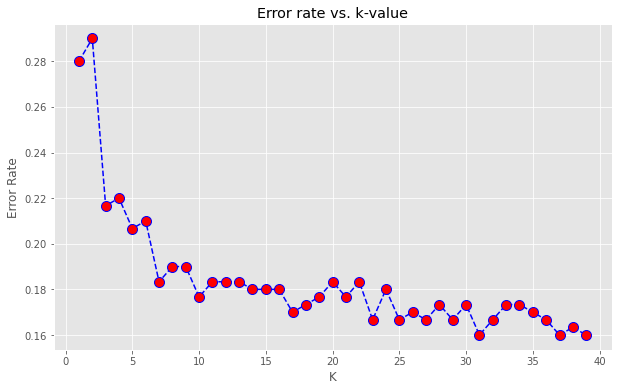

In [45]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,6))
plt.plot(range(1,40),error_rates,linestyle='--',color="blue",marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error rate vs. k-value')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [46]:
knn=KNN(n_neighbors=30)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('WITH K=31')
print("")
print(classification_report(y_test,pred))
print("Accuracy: ",knn.score(x_test,y_test))

WITH K=31

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

Accuracy:  0.8266666666666667
